In [48]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import esppy
conn = esppy.ESP('10.104.90.199', '5997')

# show the server info (verifies we're connected)
conn.server_info

{'version': '5.2',
 'engine': 'esp',
 'analytics-license': True,
 'pubsub': 5994,
 'http': 5997}

In [49]:
# Get the project
project = conn.get_project('rpggame_demo_dataflow')

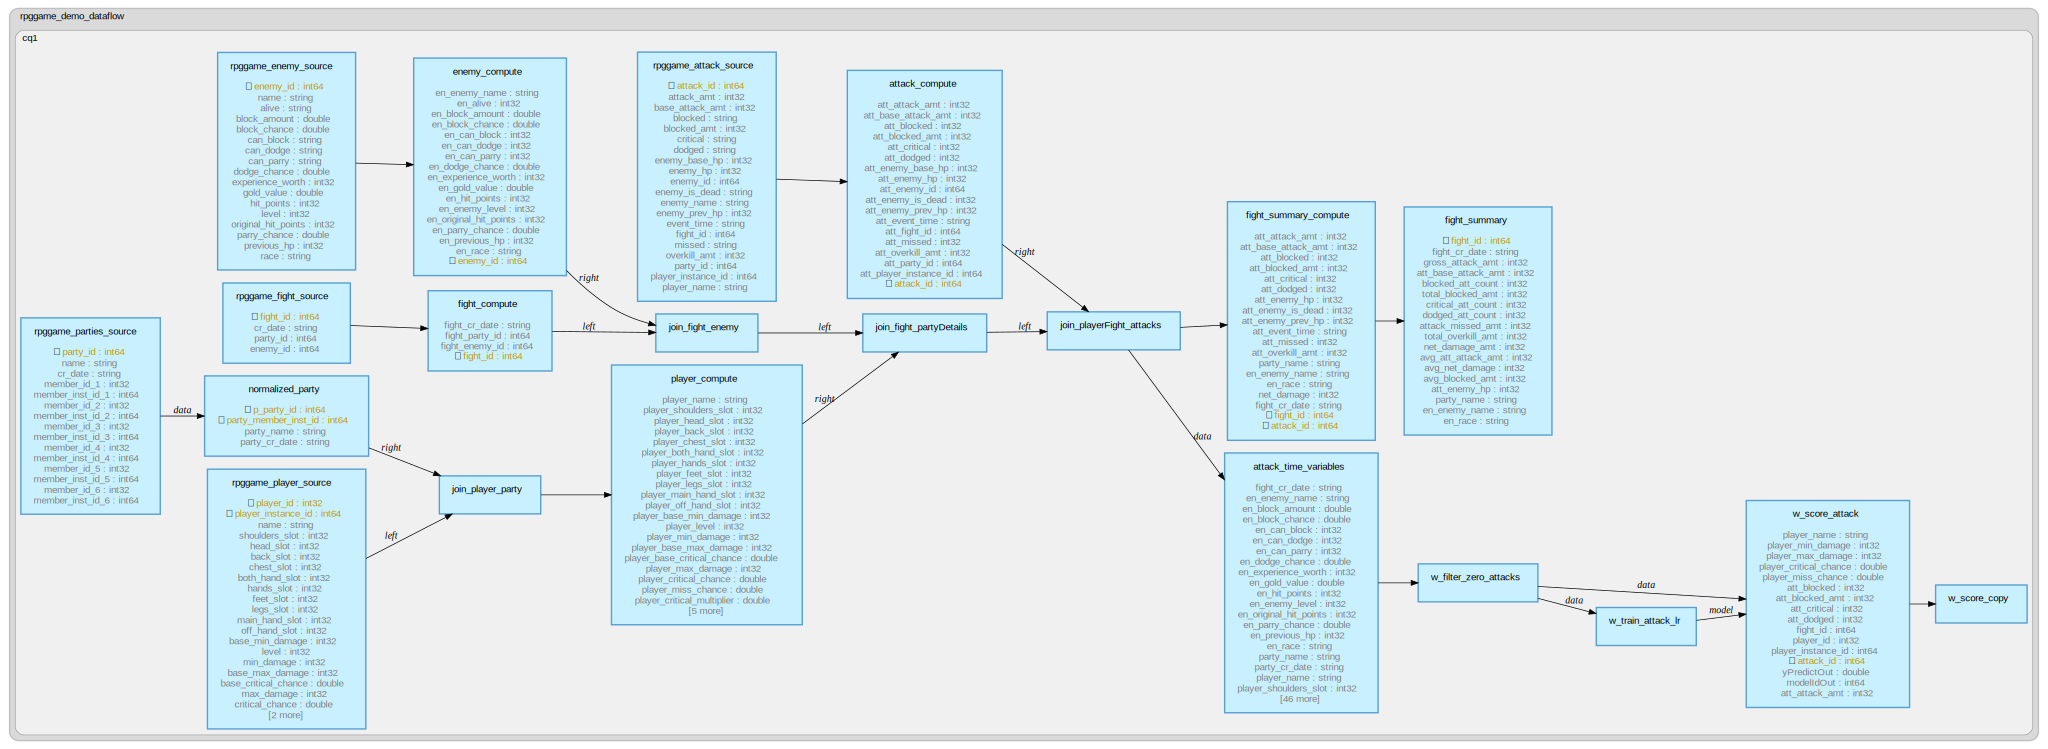

In [50]:
project.to_graph(schema=True)

In [51]:
w_score_attack = project['cq1']['w_score_attack']

w_score_attack.subscribe()

In [52]:
w_score_attack.tail(250)

,player_name,player_min_damage,player_max_damage,player_critical_chance,player_miss_chance,att_blocked,att_blocked_amt,att_critical,att_dodged,fight_id,player_id,player_instance_id,yPredictOut,modelIdOut,att_attack_amt
attack_id,,,,,,,,,,,,,,,


### Visualize

Let's create a quick *scatter plot* to take a look at how well the predictions are doing against the expected value:

In [55]:
import datetime

def plot_scatter_snapshot(points = 250, use_head=False):
    """ This method will create a two subplots which contain the critical and non critical attack
        predictions versus actual values"""
    
    not_crit = w_score_attack['att_critical'] == 0
    crit = w_score_attack['att_critical'] == 1

    if not use_head:
        y1 = w_score_attack.loc[not_crit, 'att_attack_amt'].tail(points).values.reshape(-1, 1)
        x1 = w_score_attack.loc[not_crit, 'yPredictOut'].tail(points).values.reshape(-1, 1)

        y2 = w_score_attack.loc[crit, 'att_attack_amt'].tail(points).values.reshape(-1, 1)
        x2 = w_score_attack.loc[crit, 'yPredictOut'].tail(points).values.reshape(-1, 1)
    else:
        y1 = w_score_attack.loc[not_crit, 'att_attack_amt'].head(points).values.reshape(-1, 1)
        x1 = w_score_attack.loc[not_crit, 'yPredictOut'].head(points).values.reshape(-1, 1)

        y2 = w_score_attack.loc[crit, 'att_attack_amt'].head(points).values.reshape(-1, 1)
        x2 = w_score_attack.loc[crit, 'yPredictOut'].head(points).values.reshape(-1, 1)
        
    # setup the plot
    fig, ax = plt.subplots(2, sharey=False, sharex=False)
    fig.set_size_inches((10, 8))

    l1 = ax[0].scatter(x1, y1, alpha=.5)
    l2 = ax[1].scatter(x2, y2, alpha=.5)

    fontdict = dict(fontweight='bold')
    ax[0].set_title('Non Critical Attacks', loc='left', fontdict=fontdict)
    ax[1].set_title('Critical Attacks', loc='left', fontdict=fontdict)

    ax[0].set(xlabel='predicted', ylabel='att_attack_amt')
    ax[1].set(xlabel='predicted', ylabel='att_attack_amt')
    print(datetime.datetime.utcnow());



2019-01-08 14:16:21.282215


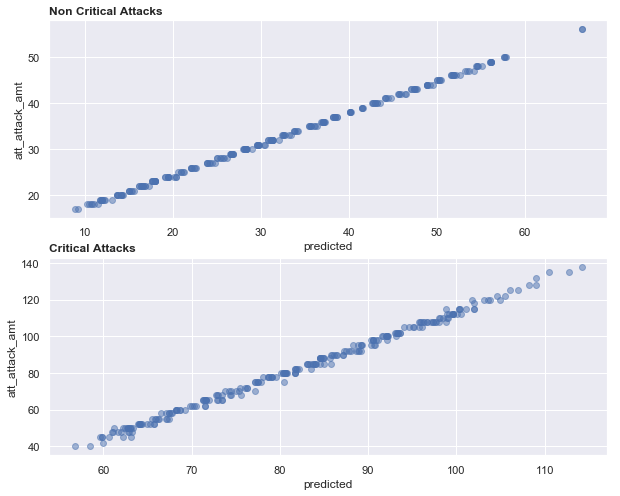

In [60]:
plot_scatter_snapshot(use_head=True)


2019-01-08 14:16:25.342440


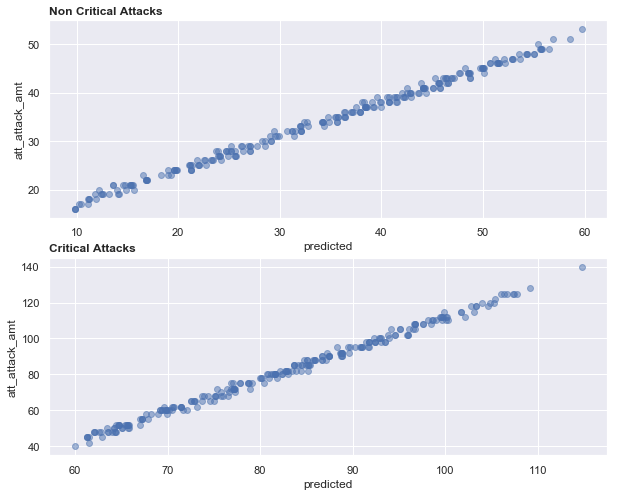

In [61]:
plot_scatter_snapshot();